# Hipoteza: Duża część katastrof lotniczych miała miejsce z powodu złych warunków pogodowych

In [81]:
import pandas as pd 

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [155]:
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,2009-05-20 06:30:00,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,2009-05-26 00:00:00,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,2009-06-01 00:15:00,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,2009-06-07 08:30:00,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [85]:
import openmeteo_requests
import requests_cache
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from retry_requests import retry

# Analiza katastrof lotniczych

In [86]:
df.shape

(5268, 13)

In [87]:
df.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [88]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [89]:
df.Operator.unique().size

2477

In [90]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [91]:
df[df.loc[:, "Operator"] == "Aeroflot"].head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
825,12/04/1946,NaN,"Meshed, Iran",Aeroflot,NaN,Meshed - Teheran,Lisunov Li-2,NaN,NaN,24.0,24.0,0.0,Crashed shortly after takeoff from Meshed airp...
1190,03/26/1952,NaN,"Moscow, Russia",Aeroflot,NaN,NaN,NaN,NaN,NaN,70.0,70.0,0.0,The plane overshot the runway and collided wit...
1273,07/27/1953,12:30,"Near Kanggye, North Korea",Aeroflot,NaN,NaN,Ilyushin IL-12,NaN,NaN,21.0,21.0,0.0,Shot down by a U.S. Air Force F-86 jet fighter...


In [92]:
df.Time.head(30)

0     17:18
1     06:30
2       NaN
3     18:30
4     10:30
5     01:00
6     15:20
7       NaN
8     01:00
9     23:45
10      NaN
11    23:45
12      NaN
13      NaN
14    05:15
15    08:45
16    07:00
17    07:45
18    21:30
19      NaN
20    10:00
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
Name: Time, dtype: object

In [98]:
type(df.Time[1])

str

In [94]:
df.Time[10:20]

10      NaN
11    23:45
12      NaN
13      NaN
14    05:15
15    08:45
16    07:00
17    07:45
18    21:30
19      NaN
Name: Time, dtype: object

In [102]:
# Czyszczenie danych date przy pomocy datetime
from datetime import date, timedelta, datetime

df['Time'] = df['Time'].replace(np.nan, '00:00') 
df['Time'] = df['Time'].str.replace('c: ', '')
df['Time'] = df['Time'].str.replace('c:', '')
df['Time'] = df['Time'].str.replace('c', '')
df['Time'] = df['Time'].str.replace('12\'20', '12:20')
df['Time'] = df['Time'].str.replace('18.40', '18:40')
df['Time'] = df['Time'].str.replace('0943', '09:43')
df['Time'] = df['Time'].str.replace('22\'08', '22:08')
df['Time'] = df['Time'].str.replace('114:20', '00:00')

df['Time'] = df['Date'] + ' ' + df['Time'] #łączenie dwóch wierszy
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
df['Time'] = df['Time'].apply(todate) #konwertowanie na typ daty

In [103]:
df.Time

0      1908-09-17 17:18:00
1      1912-07-12 06:30:00
2      1913-08-06 00:00:00
3      1913-09-09 18:30:00
4      1913-10-17 10:30:00
               ...        
5263   2009-05-20 06:30:00
5264   2009-05-26 00:00:00
5265   2009-06-01 00:15:00
5266   2009-06-07 08:30:00
5267   2009-06-08 00:00:00
Name: Time, Length: 5268, dtype: datetime64[ns]

In [104]:
print('Zakres dat od ' + str(df.Time.min()) + ' do ' + str(df.Time.max()))

Zakres dat od 1908-09-17 17:18:00 do 2009-06-08 00:00:00


# Wizualizacja danych katastrof lotniczych

In [112]:
# Najpierw chcę zobaczyć kiedy było najwięcej katastrof lotniczych

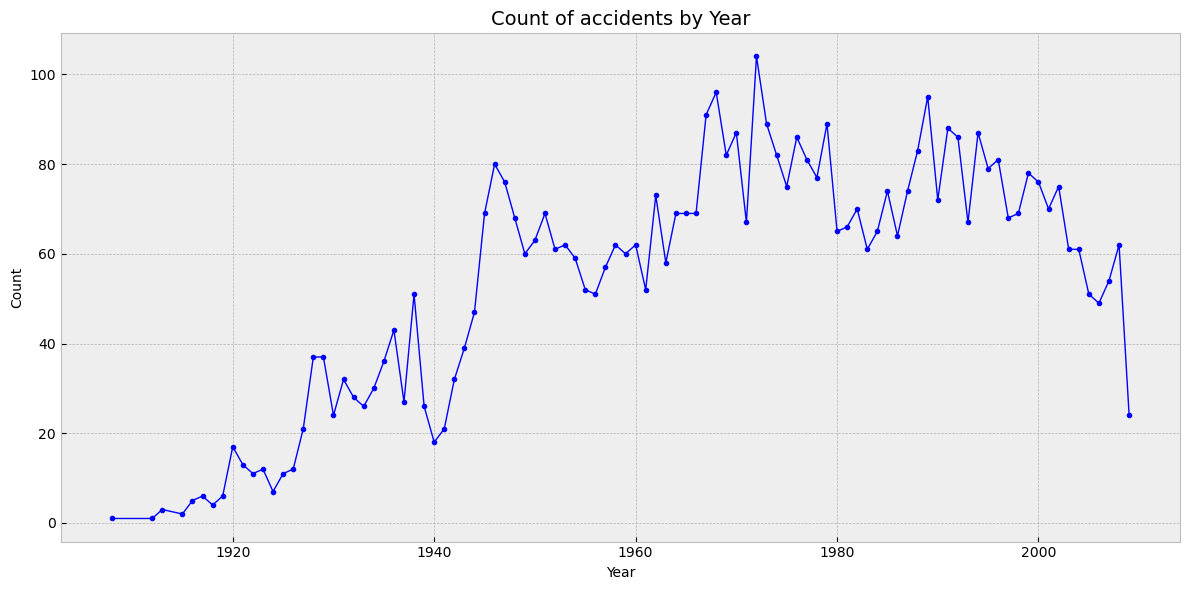

In [107]:
accidents = df.groupby(df.Time.dt.year)[['Time']].count() #ramka danych do zrobienia plota
accidents = accidents.rename(columns={"Time": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')

plt.plot(accidents.index, 'Count', data=accidents, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()

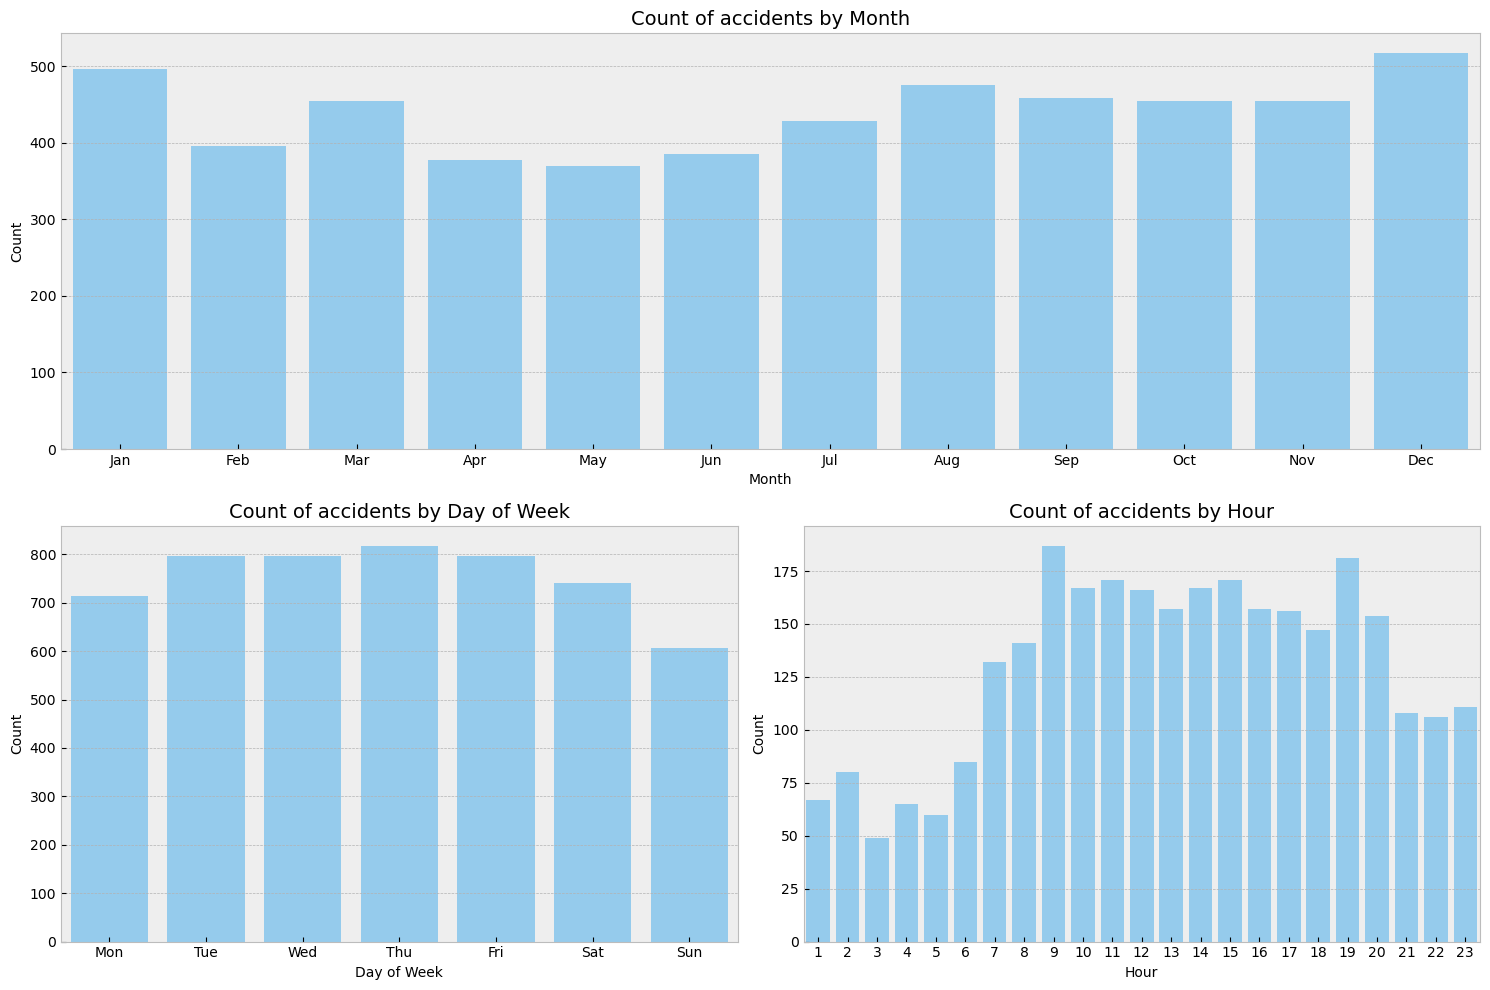

In [154]:
#grid pomaga zrobić grid layout
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15,10))
plt.style.use("bmh")

# month
ax = plt.subplot(gs[0, :])
monthly_counts = df.groupby(df.Time.dt.month)[['Date']].count()
monthly_counts.index = monthly_counts.index - 1
sns.barplot(x=monthly_counts.index, y='Date', data=monthly_counts, color='lightskyblue', linewidth=2)
plt.xticks(monthly_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
                                  'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='center', fontsize=14)

# week
ax = plt.subplot(gs[1, 0])
weekday_counts = df.groupby(df.Time.dt.weekday)[['Date']].count()
sns.barplot(x=weekday_counts.index, y='Date', data=weekday_counts, color='lightskyblue', linewidth=2)

plt.xticks(weekday_counts.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='center', fontsize=14)

# hours
ax = plt.subplot(gs[1, 1])
hourly_counts = df[df.Time.dt.hour != 0].groupby(df.Time.dt.hour)[['Date']].count()
sns.barplot(x=hourly_counts.index, y='Date', data=hourly_counts, color='lightskyblue', linewidth=2)

plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='center', fontsize=14)

plt.tight_layout()
plt.show()

In [109]:
# Jest widoczne, że najwięcej katastrof miało miejsce w grudniu i styczniu -
# kiedy pogoda w większości krajów może być niekorzystna.
# Czy rzeczywiście czynnik pogodowy często odgrywał kluczową rolę w katastrofach lotniczych?

In [22]:
df.head(2)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...


In [36]:
#Zobaczmy jakie linie lotnicze miały najwięcej katastrof lotniczych

operators = df.groupby("Operator").agg(count = ("Operator", "size")).sort_values("count", ascending = False).reset_index()

In [37]:
operators

,Operator,count
0,Aeroflot,179
1,Military - U.S. Air Force,176
2,Air France,70
3,Deutsche Lufthansa,65
4,United Air Lines,44
...,...,...
2471,Everest Air,1
2472,Europe Aero Service EAS,1
2473,Eurojet Italila,1
2474,Euroair,1


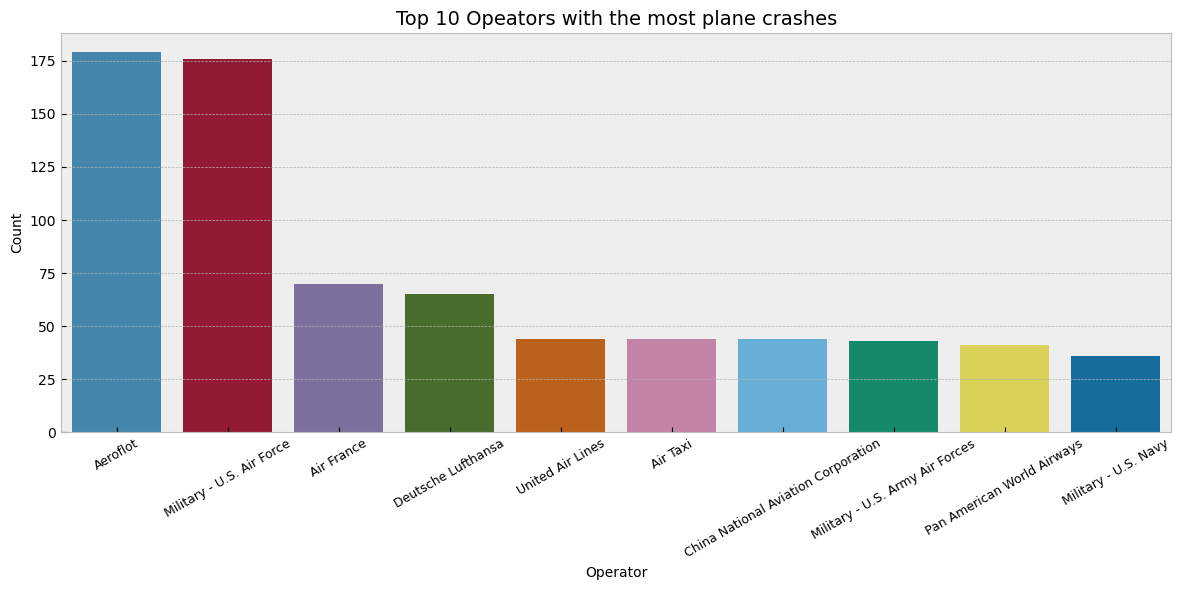

In [59]:
plt.figure(figsize=(12, 6))
plt.style.use("bmh")

sns.barplot(x="Operator", y="count", data = operators.head(10))
plt.xlabel("Operator", fontsize=10)
plt.xticks(fontsize=9, rotation=30)
plt.ylabel('Count', fontsize=10)
plt.title("Top 10 Opeators with the most plane crashes", loc = "center", fontsize = 14)

# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.(from docs.)
plt.tight_layout()
plt.show()

In [76]:
operators[operators["Operator"] == "LOT Polish Airlines"]

,Operator,count
49,LOT Polish Airlines,12


In [156]:
df["isMilitary"] = 0

In [157]:
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,isMilitary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",0
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,0
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,2009-05-20 06:30:00,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",0
5264,05/26/2009,2009-05-26 00:00:00,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,0
5265,06/01/2009,2009-06-01 00:15:00,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,0
5266,06/07/2009,2009-06-07 08:30:00,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,0


In [180]:
df.loc[df["Operator"].notna() & df["Operator"].str.contains('Military'), "isMilitary"] = 1

In [182]:
df.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,isMilitary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0


In [183]:
type_fl = df.groupby("isMilitary").agg(count = ("isMilitary", "size")).reset_index()

In [184]:
type_fl

,isMilitary,count
0,0,4487
1,1,781


In [185]:
type_fl['Flight_Type'] = type_fl['isMilitary'].map({0: 'Passenger', 1: 'Military'})

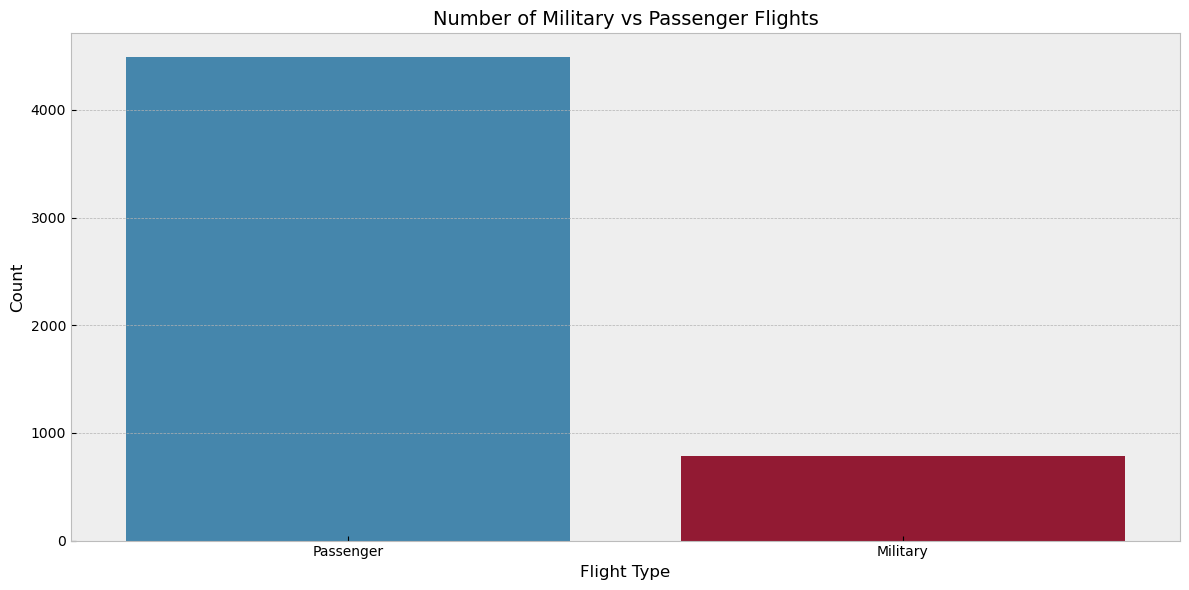

In [193]:
# loty wojskowe i pasażerskie

plt.figure(figsize=(12, 6))
plt.style.use("bmh")

sns.barplot(x='Flight_Type', y='count', data=type_fl)
plt.xlabel("Flight Type", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Number of Military vs Passenger Flights", fontsize=14)

plt.tight_layout()
plt.show()

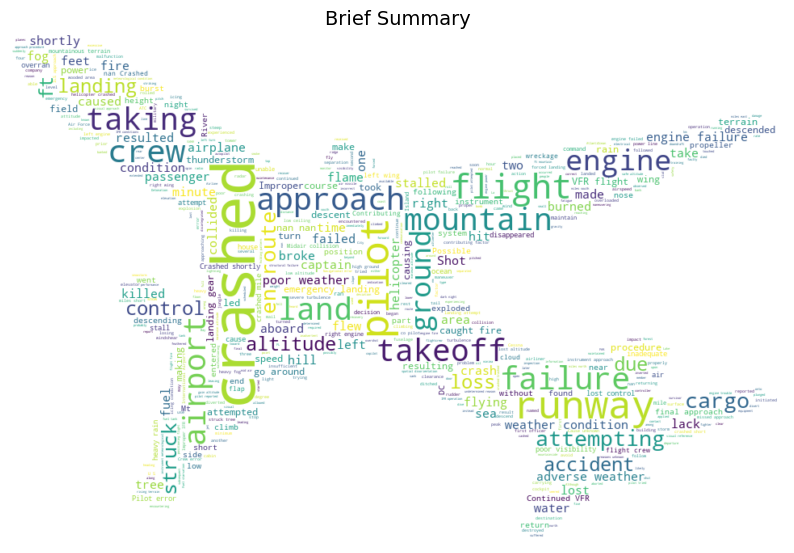

In [202]:
#zróbmy brief summary katastrof lotniczych

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df.Summary.tolist())
plane_mask = np.array(Image.open('plane_img.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Brief Summary', loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

# Czyszczenie danych

In [204]:
# nie chcemy zestrzelonych samolotów

df = df[df["Summary"].str.contains("shot", case=False, na=False) == False]

In [205]:
#Tak naprawdę mogę odrzucić niektóre kolumny z tych danych, 
#które nie zawierają żadnej przydatnej informacji do odpowiedzi na pytanie postawione mną

In [206]:
df = df.drop(["Flight #", "Route", "Type", "Registration", "cn/In", "Aboard", "Fatalities", "Ground"], axis=1)

In [207]:
df.head(3)

,Date,Time,Location,Operator,Summary,isMilitary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,"During a demonstration flight, a U.S. Army fly...",1
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,First U.S. dirigible Akron exploded just offsh...,1
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",Private,The first fatal airplane accident in Canada oc...,0


In [219]:
#Usunąłem dane sprzed 1940 roku, ponieważ strona open-meteo dostarcza dane tylko od 1940 roku
df = df[data.Time >= "1940-01-01 00:00:00"]

In [220]:
print('Zakres dat od ' + str(df.Time.min()) + ' do ' + str(df.Time.max()))

Zakres dat od 1940-01-15 00:00:00 do 2009-06-08 00:00:00


In [228]:
df = df[df.Time.dt.hour != 0]

# Uzyskanie współrzędnych dla każdej lokalizacji

In [33]:
df['Location'] = df['Location'].str.replace('AtlantiOcean', 'Atlantic Ocean')

In [34]:
df = df[df['Location'].isnull() == False]
df = df.drop(columns=["Operator", "Summary"])

In [35]:
df.shape

(2848, 3)

In [528]:
#dzielenie danych
df1 = df.iloc[:500]
df2 = df.iloc[500:1000]
df3 = df.iloc[1000:1500]
df4 = df.iloc[1500:2000]
df5 = df.iloc[2000:2500]
df6 = df.iloc[2500:2848]

df1.to_csv('dane1.csv')
df2.to_csv('dane2.csv')
df3.to_csv('dane3.csv')
df4.to_csv('dane4.csv')
df5.to_csv('dane5.csv')
df6.to_csv('dane6.csv')

In [529]:
#próbowałem uzyskać współrzędne za pomocą API, 
#biblioteki Pythona, czatu GPT, arkuszy Google i nie udało mi się 
#Danych jest dużo, więc zdecydowałem się podzielić dane i użyć narzędzia 
#do geokodowania plików online „https://www.geoapify.com/tools/geocoding-online"

In [36]:
d1 = pd.read_csv('d1.csv')
d2 = pd.read_csv('d2.csv')
d3 = pd.read_csv('d3.csv')
d4 = pd.read_csv('d4.csv')
d5 = pd.read_csv('d5.csv')
d6 = pd.read_csv('d6.csv')

In [37]:
data = pd.concat([d1, d2, d3, d4, d5, d6])

In [38]:
data

,original_,original_Date,original_Time,original_Location,lat,lon,formatted,city,housenumber,county,...,district,suburb,state,state_code,country,country_code,confidence,attribution,attribution_license,attribution_url
0,538,08/13/1940,1940-08-13 10:15:00,"Near Canberra, Australia",-27.437276,152.983344,"Canberra Drive near Frasers Road stop 36, Canb...",NaN,NaN,NaN,...,Greater Brisbane,Ashgrove,Queensland,QLD,Australia,au,0.0,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
1,540,08/31/1940,1940-08-31 14:41:00,"Near Lovettsville, Virginia",39.272869,-77.639921,"Lovettsville, VA, United States of America",Lovettsville,NaN,Loudoun County,...,NaN,NaN,Virginia,VA,United States,us,0.0,Who's On First,CC0,https://www.whosonfirst.org/docs/licenses/
2,543,11/04/1940,1940-11-04 04:42:00,"Near Centerville, Utah",40.929381,-111.885211,"Centerville, UT, United States of America",Centerville,NaN,Davis County,...,NaN,NaN,Utah,UT,United States,us,0.0,Who's On First,CC0,https://www.whosonfirst.org/docs/licenses/
3,547,12/04/1940,1940-12-04 17:48:00,"Chicago, Illinois",41.875562,-87.624421,"Chicago, IL, United States of America",Chicago,NaN,Cook County,...,NaN,NaN,Illinois,IL,United States,us,0.0,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
4,551,01/23/1941,1941-01-23 04:13:00,"Near Robertson, Missouri",38.764220,-90.382060,"Northwest Township (Robertson), MO, United Sta...",Robertson,NaN,St. Louis County,...,Northwest Township,NaN,Missouri,MO,United States,us,0.0,Who's On First,CC0,https://www.whosonfirst.org/docs/licenses/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,5261,04/29/2009,2009-04-29 06:00:00,"Massamba, DemocratiRepubliof Congo",-4.273460,15.248719,"Stade Alphonse Massamba-Débat, Avenue du 5 fév...",Brazzaville (municipality),NaN,Brazzaville,...,Makélékélé (arrondissement 1),NaN,Brazzaville (department),NaN,Congo-Brazzaville,cg,0.0,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
344,5262,05/03/2009,2009-05-03 12:00:00,"Near El Alto de Rubio, Venezuela",9.951870,-64.721290,"El Alto, B, Venezuela",El Alto,NaN,Bolivar,...,NaN,NaN,Anzoátegui,B,Venezuela,ve,0.0,Who's On First,CC0,https://www.whosonfirst.org/docs/licenses/
345,5263,05/20/2009,2009-05-20 06:30:00,"Near Madiun, Indonesia",-7.638850,111.516358,"Madiun, East Java, Indonesia",Madiun,NaN,Madiun,...,NaN,NaN,East Java,NaN,Indonesia,id,0.0,Who's On First,CC0,https://www.whosonfirst.org/docs/licenses/
346,5265,06/01/2009,2009-06-01 00:15:00,"Atlantic Ocean, 570 miles northeast of Natal, ...",-5.803737,-35.218408,"Natal, Northeast, Brazil",Natal,NaN,Rio Grande Do Norte,...,NaN,NaN,Northeast,NaN,Brazil,br,0.0,Who's On First,CC0,https://www.whosonfirst.org/docs/licenses/


In [39]:
data = data[["original_Date", "original_Time", "original_Location", "lat", "lon"]]

In [40]:
data = data.rename(columns={"original_Date":"date",
                           "original_Time":"time",
                           "original_Location":"location",
                           "lat":"lat",
                           "lon":"lon"})

In [41]:
data

,date,time,location,lat,lon
0,08/13/1940,1940-08-13 10:15:00,"Near Canberra, Australia",-27.437276,152.983344
1,08/31/1940,1940-08-31 14:41:00,"Near Lovettsville, Virginia",39.272869,-77.639921
2,11/04/1940,1940-11-04 04:42:00,"Near Centerville, Utah",40.929381,-111.885211
3,12/04/1940,1940-12-04 17:48:00,"Chicago, Illinois",41.875562,-87.624421
4,01/23/1941,1941-01-23 04:13:00,"Near Robertson, Missouri",38.764220,-90.382060
...,...,...,...,...,...
343,04/29/2009,2009-04-29 06:00:00,"Massamba, DemocratiRepubliof Congo",-4.273460,15.248719
344,05/03/2009,2009-05-03 12:00:00,"Near El Alto de Rubio, Venezuela",9.951870,-64.721290
345,05/20/2009,2009-05-20 06:30:00,"Near Madiun, Indonesia",-7.638850,111.516358
346,06/01/2009,2009-06-01 00:15:00,"Atlantic Ocean, 570 miles northeast of Natal, ...",-5.803737,-35.218408


In [549]:
#back-up
data.to_csv("data_with_coords.csv")

In [ ]:
# ----

In [515]:
# df.to_excel('data.xlsx')

In [272]:
# import requests
# API_KEY = "9b5bb93f71094c67830c5ef9bd89b0e0"

# def get_coordinates(location):
#     url = f"https://api.geoapify.com/v1/geocode/search?text={location}&limit=1&apiKey={API_KEY}"
    
#     response = requests.get(url)
    
#     # Check the response status code
#     if response.status_code == 200:
#         # Parse the JSON data from the response
#         data = response.json()
#         # Extract the first result from the data
#         if len(data["features"]) != 0:
#             result = data["features"][0]

#             # Extract the latitude and longitude of the result
#             latitude = result["geometry"]["coordinates"][1]
#             longitude = result["geometry"]["coordinates"][0]

#             return f"{latitude}, {longitude}"
#         else:
#             return ""
#     else:
#         print(f"Request failed with status code {response.status_code}")

    
#zły API, zrobię to przez library 

In [530]:
# get_coordinates("Berlin")

In [531]:
# df['Coordinates'] = df['Location'].apply(get_coordinates)

In [532]:
# pip install geopy

In [486]:
# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderTimedOut
# import time  
# geolocator = Nominatim(user_agent="airplane_crashes")
# location = geolocator.geocode("Atlantic Ocean")

# def get_coordinates(x):
#     try:
#         coords = geolocator.geocode(x)
#         if coords is not None:
#             return [coords.latitude, coords.longitude]
#         return None
#     except GeocoderTimedOut:
#         # If geocoder times out, wait for a while and then retry
#         print("Geocoder timed out. Retrying after 5 seconds...")
#         time.sleep(5)  # Wait for 5 seconds before retrying
#         return get_coordinates(x)  # Retry the function call recursively
#     except Exception as e:
#         print(f"An error occurred: {str(e)}")
#         return None

In [533]:
# print(get_coordinates("Warsaw"))

In [534]:
# df["Coordinates"] = df.Location.apply(get_coordinates)

In [535]:
# df.Coordinates.isnull().count()

In [281]:
# ----

In [230]:
data = pd.read_csv("data_with_coords.csv")

In [231]:
data.head(3)

,Unnamed: 0,date,time,location,lat,lon
0,0,08/13/1940,1940-08-13 10:15:00,"Near Canberra, Australia",-27.437276,152.983344
1,1,08/31/1940,1940-08-31 14:41:00,"Near Lovettsville, Virginia",39.272869,-77.639921
2,2,11/04/1940,1940-11-04 04:42:00,"Near Centerville, Utah",40.929381,-111.885211


# Mapa

In [233]:
import plotly.express as px
import plotly.graph_objects as go
import cartopy.crs as ccrs

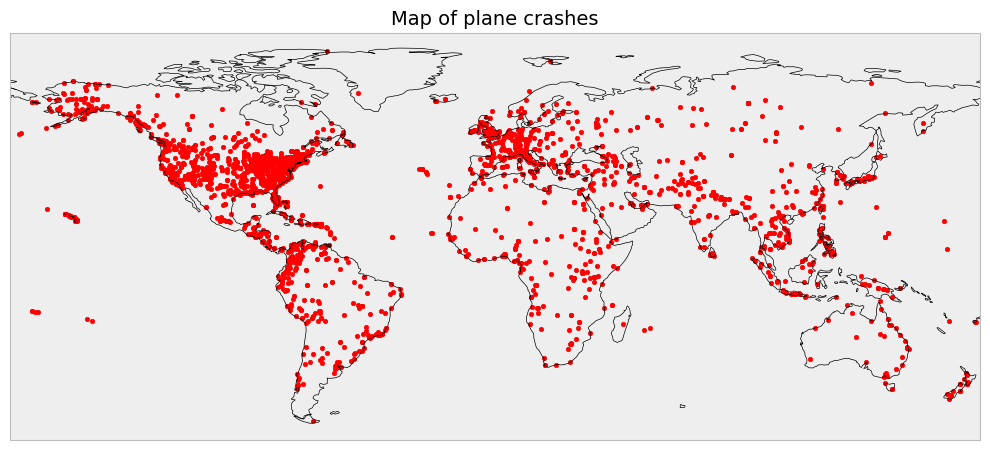

In [329]:
# Zróbmy mapę katastrof lotniczych

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.scatter(data['lon'], data['lat'], color='red', marker='o', s=10, transform=ccrs.PlateCarree())
ax.coastlines()

plt.title('Map of plane crashes', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()

# Pobieranie pogody

In [241]:
# konwertuję, żeby dostać Y-m-d
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data['date'] = data['date'].dt.strftime('%Y-%m-%d')
data.head(3)

,Unnamed: 0,date,time,location,lat,lon
0,0,1940-08-13,1940-08-13 10:15:00,"Near Canberra, Australia",-27.437276,152.983344
1,1,1940-08-31,1940-08-31 14:41:00,"Near Lovettsville, Virginia",39.272869,-77.639921
2,2,1940-11-04,1940-11-04 04:42:00,"Near Centerville, Utah",40.929381,-111.885211


In [238]:
data = data[data.lat.isnull()==False]
data = data[data.lon.isnull()==False]

In [255]:
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')

In [239]:
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

url = "https://archive-api.open-meteo.com/v1/archive"

In [246]:
def get_weather(lat, long, date):
    params = {
        "latitude": lat,
        "longitude": long,
        "start_date": date,
        "end_date": date,
        "hourly": ["temperature_2m", "precipitation", "rain", "snowfall", "cloud_cover", "wind_speed_100m"],
        "timezone": "auto"
    }
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]

    hourly = response.Hourly()
    hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
    hourly_precipitation = hourly.Variables(1).ValuesAsNumpy()
    hourly_rain = hourly.Variables(2).ValuesAsNumpy()
    hourly_snowfall = hourly.Variables(3).ValuesAsNumpy()
    hourly_cloud_cover = hourly.Variables(4).ValuesAsNumpy()
    hourly_wind_speed_100m = hourly.Variables(5).ValuesAsNumpy()

    hourly_data = {
        "time": pd.date_range(
            start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
            end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=hourly.Interval()),
            inclusive="left"
        ),
        "temperature_2m": hourly_temperature_2m,
        "precipitation": hourly_precipitation,
        "rain": hourly_rain,
        "snowfall": hourly_snowfall,
        "cloud_cover": hourly_cloud_cover,
        "wind_speed_100m": hourly_wind_speed_100m
    }

    hourly_dataframe = pd.DataFrame(data=hourly_data)
    return hourly_dataframe

In [268]:
weather_data_list = []

In [269]:
for index, row in data.iterrows():
    lat = row['lat']
    lon = row['lon']
    date = row['date']
    specific_hour = row['time'].hour

    try:
        weather_data = get_weather(lat, lon, date)

        weather_data['time'] = pd.to_datetime(weather_data['time'])

        weather_data['hour'] = weather_data['time'].dt.hour
        weather_data_specific_hour = weather_data[weather_data['hour'] == specific_hour]

        if not weather_data_specific_hour.empty:
            weather_data_specific_hour['location'] = row['location']
            weather_data_list.append(weather_data_specific_hour)

    except Exception as e:
        # Wydrukuj błąd i kontynuuj następną iterację
        print(f"Skipping location {row['location']} due to error: {e}")

Skipping location Mt. Alto del Cedro, Venezuela due to error: {'reason': 'Invalid timezone', 'error': True}
Skipping location Near Maturin, Venezuela due to error: {'error': True, 'reason': 'Invalid timezone'}
Skipping location Maturin, Venezuela due to error: {'error': True, 'reason': 'Invalid timezone'}
Skipping location Near Paramo Mucuti, Venezuela due to error: {'error': True, 'reason': 'Invalid timezone'}
Skipping location Ciudad Bolivar, Venezuela due to error: {'error': True, 'reason': 'Invalid timezone'}
Skipping location Tocomita, Venezuela due to error: {'error': True, 'reason': 'Invalid timezone'}
Skipping location Near La Cucharita, Venezuela due to error: {'error': True, 'reason': 'Invalid timezone'}


In [272]:
weather = pd.concat(weather_data_list, ignore_index=True)

In [273]:
weather.head(3)

,time,temperature_2m,precipitation,rain,snowfall,cloud_cover,wind_speed_100m,hour,location
0,1940-08-13 10:00:00+00:00,16.007999,0.0,0.0,0.0,0.000000,19.995399,10,"Near Canberra, Australia"
1,1940-08-31 14:00:00+00:00,21.240999,2.2,2.2,0.0,100.000000,13.722565,14,"Near Lovettsville, Virginia"
2,1940-11-05 04:00:00+00:00,2.350000,0.0,0.0,0.0,65.699997,4.829907,4,"Near Centerville, Utah"


In [276]:
weather.shape[0]

2809

In [277]:
data.shape[0]

2816

In [274]:
#back-up
weather.to_csv("weather.csv")

# Analiza danych pogodowych 

In [280]:
weather.head(3)

,time,temperature_2m,precipitation,rain,snowfall,cloud_cover,wind_speed_100m,hour,location
0,1940-08-13 10:00:00+00:00,16.007999,0.0,0.0,0.0,0.000000,19.995399,10,"Near Canberra, Australia"
1,1940-08-31 14:00:00+00:00,21.240999,2.2,2.2,0.0,100.000000,13.722565,14,"Near Lovettsville, Virginia"
2,1940-11-05 04:00:00+00:00,2.350000,0.0,0.0,0.0,65.699997,4.829907,4,"Near Centerville, Utah"


In [281]:
weather.describe()

,temperature_2m,precipitation,rain,snowfall,cloud_cover,wind_speed_100m,hour
count,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000
mean,14.143852,0.237807,0.218085,0.014155,55.876080,18.006458,12.928444
std,11.360563,0.734201,0.722674,0.094200,37.768600,11.588374,5.982602
min,-40.539501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.634000,0.000000,0.000000,0.000000,21.300001,9.000000,9.000000
50%,15.407000,0.000000,0.000000,0.000000,58.500000,15.937878,13.000000
75%,23.383499,0.100000,0.100000,0.000000,100.000000,24.863466,18.000000
max,40.987000,11.700000,11.700000,1.610000,100.000000,75.135719,23.000000


In [318]:
weather = weather.reset_index(drop = True)

In [319]:
weather.head(2)

,time,temperature_2m,precipitation,rain,snowfall,cloud_cover,wind_speed_100m,hour,location
0,1940-08-13 10:00:00+00:00,16.007999,0.0,0.0,0.0,0.0,19.995399,10,"Near Canberra, Australia"
1,1940-08-31 14:00:00+00:00,21.240999,2.2,2.2,0.0,100.0,13.722565,14,"Near Lovettsville, Virginia"


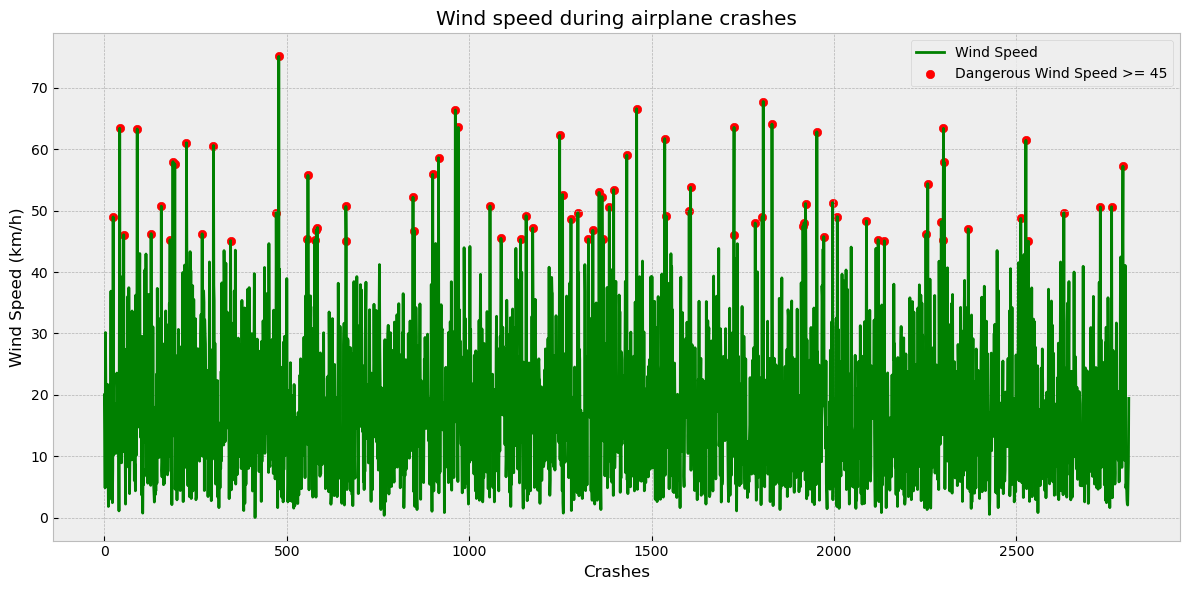

In [316]:
dangerous_threshold = 45  

plt.figure(figsize=(12, 6))
plt.plot(weather.index, weather['wind_speed_100m'], color='green', label='Wind Speed')

dangerous_wind = weather[weather['wind_speed_100m'] >= dangerous_threshold]
plt.scatter(dangerous_wind.index, dangerous_wind['wind_speed_100m'], color='red', label='Dangerous Wind Speed >= 45')

plt.title('Wind speed during airplane crashes')
plt.xlabel('Crashes')
plt.ylabel('Wind Speed (km/h)')

plt.legend()

plt.tight_layout()
plt.show()

In [295]:
dangerous_wind.shape[0]/weather.shape[0] *100

2.847988608045568

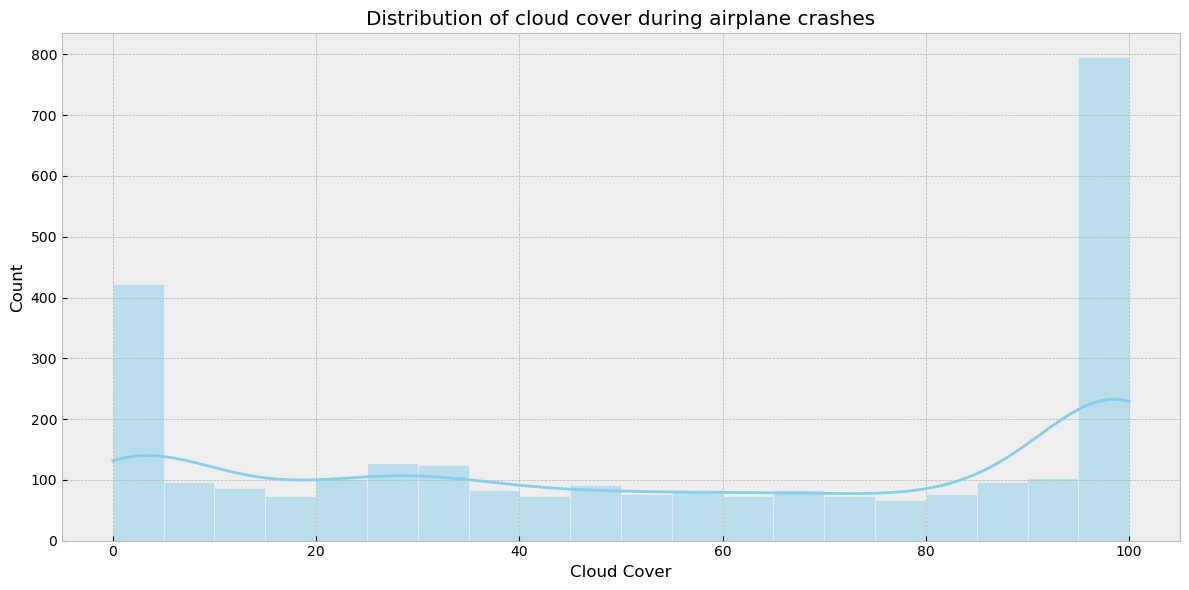

In [313]:
plt.figure(figsize=(12, 6))

sns.histplot(weather["cloud_cover"], kde=True, color='skyblue', bins=20)
plt.title('Distribution of cloud cover during airplane crashes')
plt.xlabel('Cloud Cover')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [314]:
#Można zauważyć, że w większości wypadków lotniczych niebo było całkowicie pokryte chmurami

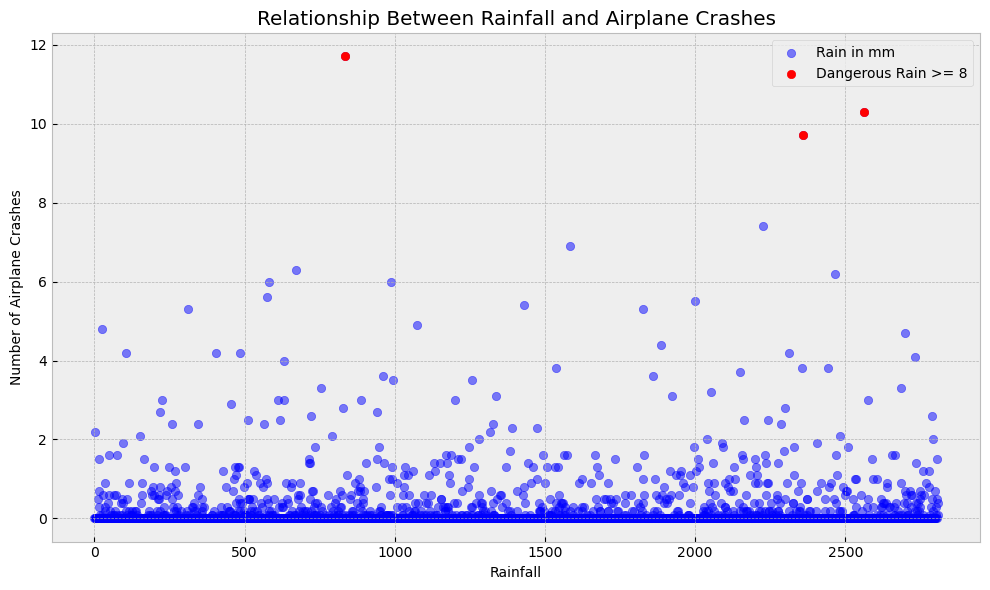

In [326]:
dangerous_threshold_rain = 8  

plt.figure(figsize=(10, 6))

dangerous_rain = weather[weather['rain'] >= dangerous_threshold_rain]
plt.scatter(x = weather.index, y = weather["rain"], color='blue', alpha=0.5, label = "Rain in mm")
plt.scatter(dangerous_rain.index, dangerous_rain['rain'], color='red', label='Dangerous Rain >= 8')

plt.title('Relationship Between Rainfall and Airplane Crashes')
plt.xlabel('Rainfall', fontsize = 10)
plt.ylabel('Number of Airplane Crashes', fontsize = 10)

plt.legend()
plt.tight_layout()
plt.show()

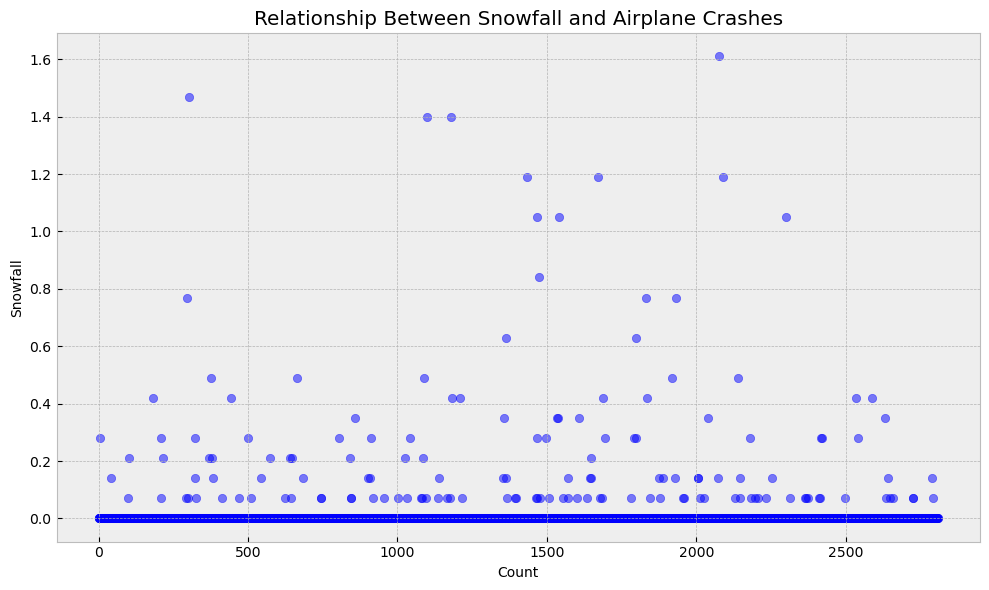

In [328]:
plt.figure(figsize=(10, 6))

plt.scatter(x = weather.index, y = weather["snowfall"], color='blue', alpha=0.5 )
plt.title('Relationship Between Snowfall and Airplane Crashes')
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Snowfall', fontsize = 10)

plt.tight_layout()
plt.show()